In [45]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo
from scipy.interpolate import griddata
from datetime import datetime, timedelta
import gsw
import datetime
import cartopy.crs as ccrs
from pathlib import Path
import cmasher as cmr
import matplotlib.colors as mcolors
import seaborn as sns
from skimage.morphology import dilation
from skimage.morphology import disk

xr.set_options(keep_attrs=True)
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
plt.rcParams['font.size']=14

In [8]:
year=2016
ds_no=xr.open_mfdataset(f'/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_nomfc/n2_[s,w,a]*tpre02_prsn02_2012_nomfc_{year}.nc')
ds_c0=xr.open_mfdataset(f'/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_mfcori/n2_[s,w,a]*tpre02_prsn02_2012_mfcorgi_{year}.nc')
ds_c2=xr.open_mfdataset(f'/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_edmfc2/n2_[s,w,a]*tpre02_prsn02_2012_edmfc2_{year}.nc')
ds_c3=xr.open_mfdataset(f'/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012/[n2_[s,w,a]*tpre02_prsn02_2012_{year}.nc')


ds_no

/home/birte/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/birte/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/birte/anaconda3/lib/

<xarray.Dataset>
Dimensions:         (depthw: 50, time_counter: 366, x: 143, y: 114)
Coordinates:
  * time_counter    (time_counter) datetime64[ns] 2016-01-01T12:00:00 ... 201...
  * depthw          (depthw) float32 0.0 1.022 2.096 ... 5.052e+03 5.5e+03
    nav_lon         (y, x) float32 dask.array<chunksize=(114, 143), meta=np.ndarray>
    nav_lat         (y, x) float32 dask.array<chunksize=(114, 143), meta=np.ndarray>
    nav_lat_grid_T  (y, x) float32 dask.array<chunksize=(114, 143), meta=np.ndarray>
    nav_lon_grid_T  (y, x) float32 dask.array<chunksize=(114, 143), meta=np.ndarray>
    year            (time_counter) float64 dask.array<chunksize=(366,), meta=np.ndarray>
    month           (time_counter) float64 dask.array<chunksize=(366,), meta=np.ndarray>
Dimensions without coordinates: x, y
Data variables:
    n2_au50         (time_counter, depthw, y, x) float32 dask.array<chunksize=(366, 50, 114, 143), meta=np.ndarray>
    n2_sp50         (time_counter, depthw, y, x) float32 dask.array<chunksize=(366, 50, 114, 143), meta=np.ndarray>
    n2_su50         (time_counter, depthw, y, x) float32 dask.array<chunksize=(366, 50, 114, 143), meta=np.ndarray>
    n2_wi50         (time_counter, depthw, y, x) float32 dask.array<chunksize=(366, 50, 114, 143), meta=np.ndarray>

In [9]:
# this is going to be masked by HAlo and Taylor cap
bat=xr.open_dataset('/home/birte/MAUD_RISE_config/maud_v4/m12_mask/1_domain_cfg_50levels_new.nc')
bat.coords['nav_lon']=bat.nav_lon
bat.coords['nav_lat']=bat.nav_lat
bat=bat.where((bat.nav_lon>=ds_no.nav_lon.min())&(bat.nav_lon<=ds_no.nav_lon.max())&(bat.nav_lat>=ds_no.nav_lat.min())&(bat.nav_lat<=ds_no.nav_lat.max()),drop=True)
bat

<xarray.Dataset>
Dimensions:       (x: 143, y: 114, z: 50)
Coordinates:
    nav_lon       (y, x) float32 -1.917 -1.833 -1.75 -1.667 ... 9.75 9.833 9.917
    nav_lat       (y, x) float32 -66.97 -66.97 -66.97 ... -63.0 -63.0 -63.0
Dimensions without coordinates: x, y, z
Data variables: (12/39)
    nav_lev       (z, y, x) float32 dask.array<chunksize=(50, 114, 143), meta=np.ndarray>
    jpiglo        (y, x) float64 dask.array<chunksize=(114, 143), meta=np.ndarray>
    jpjglo        (y, x) float64 dask.array<chunksize=(114, 143), meta=np.ndarray>
    jpkglo        (y, x) float64 dask.array<chunksize=(114, 143), meta=np.ndarray>
    jperio        (y, x) float64 dask.array<chunksize=(114, 143), meta=np.ndarray>
    ln_zco        (y, x) float64 dask.array<chunksize=(114, 143), meta=np.ndarray>
    ...            ...
    e3f_0         (z, y, x) float64 dask.array<chunksize=(50, 114, 143), meta=np.ndarray>
    e3uw_0        (z, y, x) float64 dask.array<chunksize=(50, 114, 143), meta=np.ndarray>
    e3vw_0        (z, y, x) float64 dask.array<chunksize=(50, 114, 143), meta=np.ndarray>
    bottom_level  (y, x) float64 dask.array<chunksize=(114, 143), meta=np.ndarray>
    top_level     (y, x) float64 dask.array<chunksize=(114, 143), meta=np.ndarray>
    bathy_meter   (y, x) float32 dask.array<chunksize=(114, 143), meta=np.ndarray>

In [46]:
bat['mask_tc']=np.zeros((len(bat.y),len(bat.x)))*(bat.bathy_meter.where(bat.bathy_meter<2500))+1
bat['mask_tc']=bat.mask_tc.where(((bat.mask_tc==1)&(bat.glamt<4.3)&(bat.glamt>0.5)&(bat.gphit>-65.5)),other=0)
mask_tc=bat.mask_tc
mask_tc.load()
mask_tc[55,60]=1
mask_tc[60,71]=0
bat['mask_tc']=mask_tc

mean_bathy = bat.bathy_meter.rolling(x=13,center=True).mean().rolling(y=13,center=True).mean()
bat['mask_tr_all']=np.zeros((len(bat.y),len(bat.x)))*(mean_bathy.where(mean_bathy<3500))+1
bat['mask_tr_all']=bat.mask_tr_all.where(((bat.mask_tr_all==1)&(bat.glamt<8)&(bat.gphit>-66.5)),other=0)
bat['mask_tr']=bat.mask_tr_all-bat.mask_tc

mask_tr=bat.mask_tr


bat['mask_ha'] = xr.DataArray(dilation(bat.mask_tr_all, disk(14)) - bat.mask_tr_all,dims=('y', 'x'))
bat['mask_ha']=bat.mask_ha.where(((bat.mask_ha==1)&(bat.bathy_meter<5000)),other=0)
bat['mask_ha_all'] = bat.mask_ha+bat.mask_tr_all
bat['mask_hatr'] = bat.mask_ha+bat.mask_tr
mask_ha=bat.mask_ha
mask_ha=mask_ha.rename("mask_ha")


In [7]:
ds_no.where(bat.mask_tc==1).mean(dim={'time_counter','x','y'}).to_netcdf(f'./n2_EVD_tc_{year}.nc')
ds_no.where(bat.mask_hatr==1).mean(dim={'time_counter','x','y'}).to_netcdf(f'./n2_EVD_hatr_{year}.nc')

ds_c0.where(bat.mask_tc==1).mean(dim={'time_counter','x','y'}).to_netcdf(f'./n2_EDMF_tc_{year}.nc')
ds_c0.where(bat.mask_hatr==1).mean(dim={'time_counter','x','y'}).to_netcdf(f'./n2_EDMF_hatr_{year}.nc')

ds_c2.where(bat.mask_tc==1).mean(dim={'time_counter','x','y'}).to_netcdf(f'./n2_EDMF2_tc_{year}.nc')
ds_c2.where(bat.mask_hatr==1).mean(dim={'time_counter','x','y'}).to_netcdf(f'./n2_EDMF2_hatr_{year}.nc')

ds_c3.where(bat.mask_tc==1).mean(dim={'time_counter','x','y'}).to_netcdf(f'./n2_EDMF3_tc_{year}.nc')
ds_c3.where(bat.mask_hatr==1).mean(dim={'time_counter','x','y'}).to_netcdf(f'./n2_EDMF3_hatr_{year}.nc')

/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out

In [12]:
dsno_hatr=xr.open_dataset(f'/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_nomfc/n2_EVD_hatr_{year}.nc')
dsno_hatr=dsno_hatr.expand_dims(dim={'mask_dim':['HaTr']})
dsno_tc=xr.open_dataset(f'/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_nomfc/n2_EVD_tc_{year}.nc')
dsno_tc=dsno_tc.expand_dims(dim={'mask_dim':['TC']})
dsno_mask=xr.merge((dsno_hatr,dsno_tc,xr.DataArray(['TC', 'HaTr'], name='mask', dims={'mask_dim':['TC', 'HaTr']}, coords={'mask_dim':['TC', 'HaTr']})))

dsc0_hatr=xr.open_dataset(f'/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_mfcori/n2_EDMF_hatr_{year}.nc')
dsc0_hatr=dsc0_hatr.expand_dims(dim={'mask_dim':['HaTr']})
dsc0_tc=xr.open_dataset(f'/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_mfcori/n2_EDMF_tc_{year}.nc')
dsc0_tc=dsc0_tc.expand_dims(dim={'mask_dim':['TC']})
dsc0_mask=xr.merge((dsc0_hatr,dsc0_tc,xr.DataArray(['TC', 'HaTr'], name='mask', dims={'mask_dim':['TC', 'HaTr']}, coords={'mask_dim':['TC', 'HaTr']})))


dsc2_hatr=xr.open_dataset(f'/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_edmfc2/n2_EDMF2_hatr_{year}.nc')
dsc2_hatr=dsc2_hatr.expand_dims(dim={'mask_dim':['HaTr']})
dsc2_tc=xr.open_dataset(f'/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012_edmfc2/n2_EDMF2_tc_{year}.nc')
dsc2_tc=dsc2_tc.expand_dims(dim={'mask_dim':['TC']})
dsc2_mask=xr.merge((dsc2_hatr,dsc2_tc,xr.DataArray(['TC', 'HaTr'], name='mask', dims={'mask_dim':['TC', 'HaTr']}, coords={'mask_dim':['TC', 'HaTr']})))


dsc3_hatr=xr.open_dataset(f'/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012/n2_EDMF3_hatr_{year}.nc')
dsc3_hatr=dsc3_hatr.expand_dims(dim={'mask_dim':['HaTr']})
dsc3_tc=xr.open_dataset(f'/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012/n2_EDMF3_tc_{year}.nc')
dsc3_tc=dsc3_tc.expand_dims(dim={'mask_dim':['TC']})
dsc3_mask=xr.merge((dsc3_hatr,dsc3_tc,xr.DataArray(['TC', 'HaTr'], name='mask', dims={'mask_dim':['TC', 'HaTr']}, coords={'mask_dim':['TC', 'HaTr']})))


In [13]:
dsno_mask=dsno_mask.expand_dims(dim={'scheme_dim':['EVD']})
dsc0_mask=dsc0_mask.expand_dims(dim={'scheme_dim':['EDMF']})
dsc2_mask=dsc2_mask.expand_dims(dim={'scheme_dim':['EDMF2']})
dsc3_mask=dsc3_mask.expand_dims(dim={'scheme_dim':['EDMF3']})

In [14]:
dsall=xr.merge((dsno_mask,dsc0_mask,dsc2_mask,dsc3_mask,xr.DataArray(['EVD', 'EDMF', 'EDMF2', 'EDMF3'], name='scheme', dims={'scheme_dim':['EVD', 'EDMF', 'EDMF2', 'EDMF3']}, coords={'scheme_dim':['EVD', 'EDMF', 'EDMF2', 'EDMF3']})))
dsall

<xarray.Dataset>
Dimensions:     (depthw: 50, mask_dim: 2, scheme_dim: 4)
Coordinates:
  * scheme_dim  (scheme_dim) <U5 'EDMF' 'EDMF2' 'EDMF3' 'EVD'
  * mask_dim    (mask_dim) <U4 'HaTr' 'TC'
  * depthw      (depthw) float32 0.0 1.022 2.096 ... 4.617e+03 5.052e+03 5.5e+03
Data variables:
    n2_au50     (scheme_dim, mask_dim, depthw) float32 nan nan nan ... nan nan
    n2_sp50     (scheme_dim, mask_dim, depthw) float32 nan nan nan ... nan nan
    n2_su50     (scheme_dim, mask_dim, depthw) float32 nan nan nan ... nan nan
    n2_wi50     (scheme_dim, mask_dim, depthw) float32 nan nan nan ... nan nan
    mask        (scheme_dim, mask_dim) object 'HaTr' 'TC' 'HaTr' ... 'HaTr' 'TC'
    scheme      (scheme_dim) <U5 'EDMF' 'EDMF2' 'EDMF3' 'EVD'

In [11]:
df=dsall.assign_coords({'scheme_dim':[1,2,3,4]}).to_dataframe()
df

n2_au50  n2_sp50  n2_su50  n2_wi50  mask  \
depthw      mask_dim scheme_dim                                             
0.000000    HaTr     1               NaN      NaN      NaN      NaN  HaTr   
                     2               NaN      NaN      NaN      NaN  HaTr   
                     3               NaN      NaN      NaN      NaN  HaTr   
                     4               NaN      NaN      NaN      NaN  HaTr   
            TC       1               NaN      NaN      NaN      NaN    TC   
...                                  ...      ...      ...      ...   ...   
5499.565918 HaTr     4               NaN      NaN      NaN      NaN  HaTr   
            TC       1               NaN      NaN      NaN      NaN    TC   
                     2               NaN      NaN      NaN      NaN    TC   
                     3               NaN      NaN      NaN      NaN    TC   
                     4               NaN      NaN      NaN      NaN    TC   

                                scheme  
depthw      mask_dim scheme_dim         
0.000000    HaTr     1            EDMF  
                     2           EDMF2  
                     3           EDMF3  
                     4             EVD  
            TC       1            EDMF  
...                                ...  
5499.565918 HaTr     4             EVD  
            TC       1            EDMF  
                     2           EDMF2  
                     3           EDMF3  
                     4             EVD  

[400 rows x 6 columns]

In [12]:
df_hatr=dsall.isel(mask_dim=0).assign_coords({'scheme_dim':[1,2,3,4]}).to_dataframe()
df_hatr
df_tc=dsall.isel(mask_dim=1).assign_coords({'scheme_dim':[1,2,3,4]}).to_dataframe()
df_tc

mask_dim  n2_au50  n2_sp50  n2_su50  n2_wi50 mask  \
depthw      scheme_dim                                                     
0.000000    1                TC      NaN      NaN      NaN      NaN   TC   
            2                TC      NaN      NaN      NaN      NaN   TC   
            3                TC      NaN      NaN      NaN      NaN   TC   
            4                TC      NaN      NaN      NaN      NaN   TC   
1.022484    1                TC      NaN      NaN      NaN      NaN   TC   
...                         ...      ...      ...      ...      ...  ...   
5051.966309 4                TC      NaN      NaN      NaN      NaN   TC   
5499.565918 1                TC      NaN      NaN      NaN      NaN   TC   
            2                TC      NaN      NaN      NaN      NaN   TC   
            3                TC      NaN      NaN      NaN      NaN   TC   
            4                TC      NaN      NaN      NaN      NaN   TC   

                       scheme  
depthw      scheme_dim         
0.000000    1            EDMF  
            2           EDMF2  
            3           EDMF3  
            4             EVD  
1.022484    1            EDMF  
...                       ...  
5051.966309 4             EVD  
5499.565918 1            EDMF  
            2           EDMF2  
            3           EDMF3  
            4             EVD  

[200 rows x 7 columns]

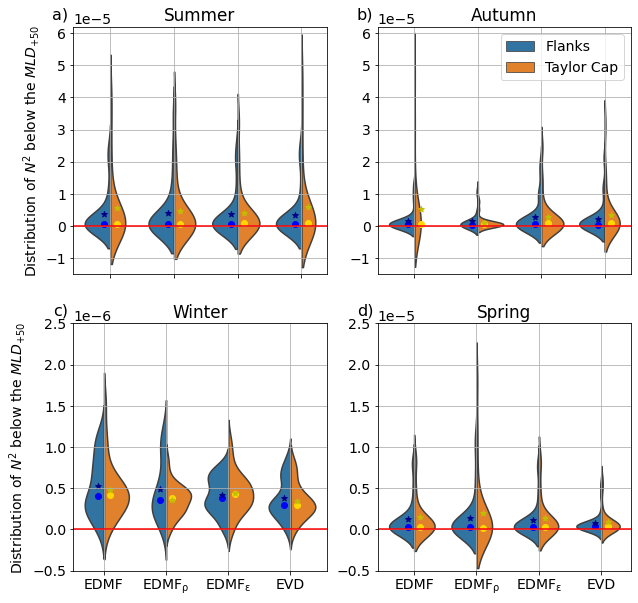

In [31]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
sns.violinplot(data=df, y='n2_su50', x='scheme',ax=axes[0,0],inner=None, hue='mask',split=True)
sns.violinplot(data=df, y='n2_au50', x='scheme',ax=axes[0,1],inner=None, hue='mask',split=True)
sns.violinplot(data=df, y='n2_wi50', x='scheme',ax=axes[1,0],inner=None, hue='mask',split=True)
sns.violinplot(data=df, y='n2_sp50', x='scheme',ax=axes[1,1],inner=None, hue='mask',split=True)

# add medians to the plot
axes[0,0].scatter(x=[0.1,1.1,2.1,3.1],y=df_tc.groupby('scheme')['n2_su50'].median(),c="gold")
axes[0,0].scatter(x=[-0.1,0.9,1.9,2.9],y=df_hatr.groupby('scheme')['n2_su50'].median(),c="b")

axes[0,1].scatter(x=[0.1,1.1,2.1,3.1],y=df_tc.groupby('scheme')['n2_au50'].median(),c="gold")
axes[0,1].scatter(x=[-0.1,0.9,1.9,2.9],y=df_hatr.groupby('scheme')['n2_au50'].median(),c="b")

axes[1,0].scatter(x=[0.1,1.1,2.1,3.1],y=df_tc.groupby('scheme')['n2_wi50'].median(),c="gold")
axes[1,0].scatter(x=[-0.1,0.9,1.9,2.9],y=df_hatr.groupby('scheme')['n2_wi50'].median(),c="b")

axes[1,1].scatter(x=[0.1,1.1,2.1,3.1],y=df_tc.groupby('scheme')['n2_sp50'].median(),c="gold")
axes[1,1].scatter(x=[-0.1,0.9,1.9,2.9],y=df_hatr.groupby('scheme')['n2_sp50'].median(),c="b")


# add means to the plot
axes[0,0].scatter(x=[0.1,1.1,2.1,3.1],y=df_tc.groupby('scheme')['n2_su50'].mean(),c="y",marker="*")
axes[0,0].scatter(x=[-0.1,0.9,1.9,2.9],y=df_hatr.groupby('scheme')['n2_su50'].mean(),c="darkblue",marker="*")

axes[0,1].scatter(x=[0.1,1.1,2.1,3.1],y=df_tc.groupby('scheme')['n2_au50'].mean(),c="y",marker="*")
axes[0,1].scatter(x=[-0.1,0.9,1.9,2.9],y=df_hatr.groupby('scheme')['n2_au50'].mean(),c="darkblue",marker="*")

axes[1,0].scatter(x=[0.1,1.1,2.1,3.1],y=df_tc.groupby('scheme')['n2_wi50'].mean(),c="y",marker="*")
axes[1,0].scatter(x=[-0.1,0.9,1.9,2.9],y=df_hatr.groupby('scheme')['n2_wi50'].mean(),c="darkblue",marker="*")

axes[1,1].scatter(x=[0.1,1.1,2.1,3.1],y=df_tc.groupby('scheme')['n2_sp50'].mean(),c="y",marker="*")
axes[1,1].scatter(x=[-0.1,0.9,1.9,2.9],y=df_hatr.groupby('scheme')['n2_sp50'].mean(),c="darkblue",marker="*")

# legend properties
axes[0,1].legend(title=None,labels=['Flanks','Taylor Cap'])
axes[0,0].get_legend().remove()
axes[1,0].get_legend().remove()
axes[1,1].get_legend().remove()
# yaxis limits
axes[0,0].set_ylim(-1.5e-5,6.2e-5)
axes[0,1].set_ylim(-1.5e-5,6.2e-5)
axes[1,0].set_ylim(-0.5e-6,2.5e-6)
axes[1,1].set_ylim(-0.5e-5,2.5e-5)

# layout properties
axes[0,0].grid()
axes[0,1].grid()
axes[1,0].grid()
axes[1,1].grid()
axes[0,0].axhline(0, color='r')
axes[1,0].axhline(0, color='r')
axes[0,1].axhline(0, color='r')
axes[1,1].axhline(0, color='r')
axes[0,0].set_title('Summer')
axes[0,1].set_title('Autumn')
axes[1,0].set_title('Winter')
axes[1,1].set_title('Spring')
axes[0,0].set_xticklabels('')
axes[0,1].set_xticklabels('')
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[1,0].set_xlabel('')
axes[1,1].set_xlabel('')
axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')
axes[0,0].set_ylabel('Distribution of $N^2$ below the $MLD_{+50}$')
axes[1,0].set_ylabel('Distribution of $N^2$ below the $MLD_{+50}$')
axes[1,0].set_xticklabels(['EDMF','$\mathrm{EDMF_{\\rho}}$','$\mathrm{EDMF_{\\epsilon}}$','EVD'])
axes[1,1].set_xticklabels(['EDMF','$\mathrm{EDMF_{\\rho}}$','$\mathrm{EDMF_{\\epsilon}}$','EVD'])
axes[0,0].text(-0.05, 1.05, 'a)', horizontalalignment='center',verticalalignment='center', transform=axes[0,0].transAxes,fontsize='16')
axes[0,1].text(-0.05, 1.05, 'b)', horizontalalignment='center',verticalalignment='center', transform=axes[0,1].transAxes,fontsize='16')
axes[1,0].text(-0.05, 1.05, 'c)', horizontalalignment='center',verticalalignment='center', transform=axes[1,0].transAxes,fontsize='16')
axes[1,1].text(-0.05, 1.05, 'd)', horizontalalignment='center',verticalalignment='center', transform=axes[1,1].transAxes,fontsize='16')
plt.savefig(f'./figures/N2_violins_{year}.jpg',dpi=300)

In [75]:
# do activity analysis

2016

In [15]:
ds_no["n2_wi_count"]=xr.where((ds_no.n2_wi50<0),1,0)
ds_no["n2_au_count"]=xr.where((ds_no.n2_au50<0),1,0)
ds_no["n2_su_count"]=xr.where((ds_no.n2_su50<0),1,0)
ds_no["n2_sp_count"]=xr.where((ds_no.n2_sp50<0),1,0)

ds_no["n2_wi_ha50"]=ds_no.n2_wi_count.where(bat.mask_hatr==1).sum({'x','y','time_counter'})
ds_no["n2_wi_tc50"]=ds_no.n2_wi_count.where(bat.mask_tc==1).sum({'x','y','time_counter'})
ds_no["n2_au_ha50"]=ds_no.n2_au_count.where(bat.mask_hatr==1).sum({'x','y','time_counter'})
ds_no["n2_au_tc50"]=ds_no.n2_au_count.where(bat.mask_tc==1).sum({'x','y','time_counter'})
ds_no["n2_su_ha50"]=ds_no.n2_su_count.where(bat.mask_hatr==1).sum({'x','y','time_counter'})
ds_no["n2_su_tc50"]=ds_no.n2_su_count.where(bat.mask_tc==1).sum({'x','y','time_counter'})
ds_no["n2_sp_ha50"]=ds_no.n2_sp_count.where(bat.mask_hatr==1).sum({'x','y','time_counter'})
ds_no["n2_sp_tc50"]=ds_no.n2_sp_count.where(bat.mask_tc==1).sum({'x','y','time_counter'})


In [16]:
ds_c3["n2_wi_count"]=xr.where((ds_c3.n2_wi50<0),1,0)
ds_c3["n2_au_count"]=xr.where((ds_c3.n2_au50<0),1,0)
ds_c3["n2_su_count"]=xr.where((ds_c3.n2_su50<0),1,0)
ds_c3["n2_sp_count"]=xr.where((ds_c3.n2_sp50<0),1,0)

ds_c3["n2_wi_ha50"]=ds_c3.n2_wi_count.where(bat.mask_hatr==1).sum({'x','y','time_counter'})
ds_c3["n2_wi_tc50"]=ds_c3.n2_wi_count.where(bat.mask_tc==1).sum({'x','y','time_counter'})
ds_c3["n2_au_ha50"]=ds_c3.n2_au_count.where(bat.mask_hatr==1).sum({'x','y','time_counter'})
ds_c3["n2_au_tc50"]=ds_c3.n2_au_count.where(bat.mask_tc==1).sum({'x','y','time_counter'})
ds_c3["n2_su_ha50"]=ds_c3.n2_su_count.where(bat.mask_hatr==1).sum({'x','y','time_counter'})
ds_c3["n2_su_tc50"]=ds_c3.n2_su_count.where(bat.mask_tc==1).sum({'x','y','time_counter'})
ds_c3["n2_sp_ha50"]=ds_c3.n2_sp_count.where(bat.mask_hatr==1).sum({'x','y','time_counter'})
ds_c3["n2_sp_tc50"]=ds_c3.n2_sp_count.where(bat.mask_tc==1).sum({'x','y','time_counter'})


In [17]:
ds_no.n2_wi_ha50.load()
ds_no.n2_wi_tc50.load()
ds_c3.n2_wi_ha50.load()
ds_c3.n2_wi_tc50.load()
ds_no.n2_au_ha50.load()
ds_no.n2_au_tc50.load()
ds_c3.n2_au_ha50.load()
ds_c3.n2_au_tc50.load()
ds_no.n2_su_ha50.load()
ds_no.n2_su_tc50.load()
ds_c3.n2_su_ha50.load()
ds_c3.n2_su_tc50.load()
ds_no.n2_sp_ha50.load()
ds_no.n2_sp_tc50.load()
ds_c3.n2_sp_ha50.load()
ds_c3.n2_sp_tc50.load()

<xarray.DataArray 'n2_sp_tc50' (depthw: 50)>
array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  21.,  62.,  79.,
        58.,  23.,  23.,  41.,  18.,   0.,   1.,   2.,   4.,   7.,   5.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 214.,  26.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.])
Coordinates:
  * depthw   (depthw) float32 0.0 1.022 2.096 ... 4.617e+03 5.052e+03 5.5e+03

In [19]:
# include wp from EDMF C3
ds_c3_wp=xr.open_dataset('/home/birte/Maud12_sensitivityruns/EXP_tpre02_prsn02_2012/mfwp_propertiesblwmld50_seas_2016_tpre02_prsn02_2012.nc')
ds_c3_wp=ds_c3_wp.where((ds_c3_wp.lon>=ds_no.nav_lon.min())&(ds_c3_wp.lon<=ds_no.nav_lon.max())&(ds_c3_wp.lat>=ds_no.nav_lat.min())&(ds_c3_wp.lat<=ds_no.nav_lat.max()),drop=True)
ds_c3_wp

<xarray.Dataset>
Dimensions:  (depthw: 50, x: 143, y: 114, year: 1)
Coordinates:
  * depthw   (depthw) float32 0.0 1.022 2.096 ... 4.617e+03 5.052e+03 5.5e+03
  * x        (x) int64 38 39 40 41 42 43 44 45 ... 174 175 176 177 178 179 180
  * y        (y) int64 118 119 120 121 122 123 124 ... 226 227 228 229 230 231
    lat      (y, x) float32 -66.97 -66.97 -66.97 -66.97 ... -63.0 -63.0 -63.0
    lon      (y, x) float32 -1.917 -1.833 -1.75 -1.667 ... 9.75 9.833 9.917
  * year     (year) int64 2016
Data variables:
    wp_su50  (year, depthw, y, x) float64 dask.array<chunksize=(1, 50, 114, 143), meta=np.ndarray>
    wp_wi50  (year, depthw, y, x) float64 dask.array<chunksize=(1, 50, 114, 143), meta=np.ndarray>
    wp_au50  (year, depthw, y, x) float64 dask.array<chunksize=(1, 50, 114, 143), meta=np.ndarray>
    wp_sp50  (year, depthw, y, x) float64 dask.array<chunksize=(1, 50, 114, 143), meta=np.ndarray>

In [20]:
ds_c3_wp["wp_wi_ha50"]=ds_c3_wp.wp_wi50.where(bat.mask_hatr==1).sum({'x','y','year'})
ds_c3_wp["wp_wi_tc50"]=ds_c3_wp.wp_wi50.where(bat.mask_tc==1).sum({'x','y','year'})

In [21]:
ds_c3_wp.wp_wi_ha50.load()
ds_c3_wp.wp_wi_tc50.load()

<xarray.DataArray 'wp_wi_tc50' (depthw: 50)>
array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,   11.,  504.,  794.,  991., 1217., 1282., 1504., 2135.,
       9997., 8784., 3489., 1921., 1420., 1160.,  920.,  690.,  441.,
        211.,   70.,   19.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.])
Coordinates:
  * depthw   (depthw) float32 0.0 1.022 2.096 ... 4.617e+03 5.052e+03 5.5e+03

In [22]:
ds_no["n2_ha50"]=ds_no.n2_au_ha50+ds_no.n2_wi_ha50+ds_no.n2_su_ha50+ds_no.n2_sp_ha50
ds_no["n2_tc50"]=ds_no.n2_au_tc50+ds_no.n2_wi_tc50+ds_no.n2_su_tc50+ds_no.n2_sp_tc50
ds_c3["n2_ha50"]=ds_c3.n2_au_ha50+ds_c3.n2_wi_ha50+ds_c3.n2_su_ha50+ds_c3.n2_sp_ha50
ds_c3["n2_tc50"]=ds_c3.n2_au_tc50+ds_c3.n2_wi_tc50+ds_c3.n2_su_tc50+ds_c3.n2_sp_tc50
ds_c3_wp["wp_ha50"]=(ds_c3_wp.wp_wi50+ds_c3_wp.wp_au50+ds_c3_wp.wp_su50+ds_c3_wp.wp_sp50).where(bat.mask_hatr==1).sum({'x','y','year'})
ds_c3_wp["wp_tc50"]=(ds_c3_wp.wp_wi50+ds_c3_wp.wp_au50+ds_c3_wp.wp_su50+ds_c3_wp.wp_sp50).where(bat.mask_tc==1).sum({'x','y','year'})

In [36]:
ds_c3_a=xr.merge((ds_c3_wp,ds_c3))
ds_c3_a

<xarray.Dataset>
Dimensions:         (depthw: 50, time_counter: 366, x: 143, y: 114, year: 1)
Coordinates:
  * x               (x) int64 38 39 40 41 42 43 44 ... 175 176 177 178 179 180
  * y               (y) int64 118 119 120 121 122 123 ... 227 228 229 230 231
  * depthw          (depthw) float32 0.0 1.022 2.096 ... 5.052e+03 5.5e+03
    lat             (y, x) float32 -66.97 -66.97 -66.97 ... -63.0 -63.0 -63.0
    lon             (y, x) float32 -1.917 -1.833 -1.75 ... 9.75 9.833 9.917
  * year            (year) int64 2016
  * time_counter    (time_counter) datetime64[ns] 2016-01-01T12:00:00 ... 201...
    nav_lon         (y, x) float32 dask.array<chunksize=(114, 143), meta=np.ndarray>
    nav_lat         (y, x) float32 dask.array<chunksize=(114, 143), meta=np.ndarray>
    nav_lat_grid_T  (y, x) float32 dask.array<chunksize=(114, 143), meta=np.ndarray>
    nav_lon_grid_T  (y, x) float32 dask.array<chunksize=(114, 143), meta=np.ndarray>
    month           (time_counter) float64 dask.array<chunksize=(366,), meta=np.ndarray>
Data variables: (12/26)
    wp_su50         (year, depthw, y, x) float64 dask.array<chunksize=(1, 50, 114, 143), meta=np.ndarray>
    wp_wi50         (year, depthw, y, x) float64 dask.array<chunksize=(1, 50, 114, 143), meta=np.ndarray>
    wp_au50         (year, depthw, y, x) float64 dask.array<chunksize=(1, 50, 114, 143), meta=np.ndarray>
    wp_sp50         (year, depthw, y, x) float64 dask.array<chunksize=(1, 50, 114, 143), meta=np.ndarray>
    wp_wi_ha50      (depthw) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 34.0 0.0 0.0
    wp_wi_tc50      (depthw) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...              ...
    n2_su_ha50      (depthw) float64 0.0 0.0 0.0 0.0 0.0 ... 796.0 844.0 0.0 0.0
    n2_su_tc50      (depthw) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    n2_sp_ha50      (depthw) float64 0.0 0.0 0.0 0.0 ... 4.218e+03 0.0 0.0
    n2_sp_tc50      (depthw) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    n2_ha50         (depthw) float64 0.0 0.0 0.0 0.0 ... 1.181e+04 0.0 0.0
    n2_tc50         (depthw) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

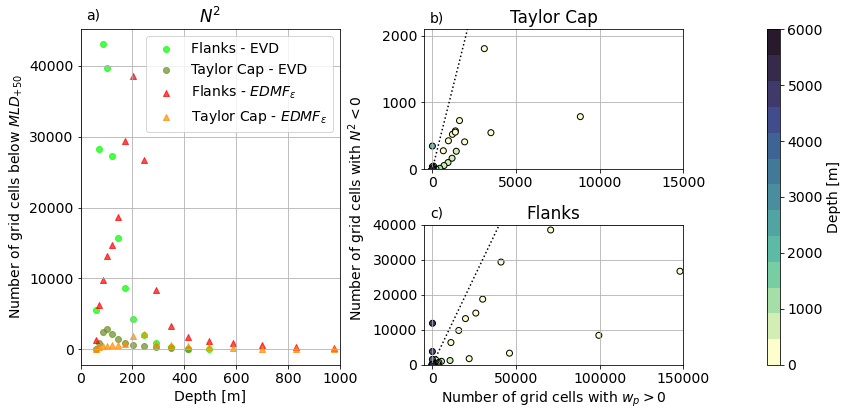

In [124]:
norm_depth=plt.Normalize(0, 6000,clip=True)
fig = plt.figure(figsize=(12,6))
gs = GridSpec(1,3, width_ratios=[1,1,0.05])#, wspace=0.3)

gs1 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[0])
gs2 = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1], hspace=.4)
gs3 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[2])

ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs2[0])
ax3 = fig.add_subplot(gs2[1])
c_ax1 = fig.add_subplot(gs3[0])


ax=ax1
ax.scatter(ds_no.depthw,ds_no.n2_ha50.where(ds_no.n2_ha50>0),color='lime',alpha=.7,label='Flanks - EVD')
ax.scatter(ds_no.depthw,ds_no.n2_tc50.where(ds_no.n2_tc50>0),color='olivedrab',alpha=.7,label='Taylor Cap - EVD')
ax.scatter(ds_c3.depthw,ds_c3.n2_ha50.where(ds_c3.n2_ha50>0),color='red',alpha=.7,label='Flanks - $EDMF_{\\epsilon}$',marker='^')
ax.scatter(ds_c3.depthw,ds_c3.n2_tc50.where(ds_c3.n2_tc50>0),color='darkorange',alpha=.7,label='Taylor Cap - $EDMF_{\\epsilon}$',marker='^')
ax.set_xlabel('Depth [m]')
ax.set_ylabel('Number of grid cells below $MLD_{+50}$')
ax.set_title('$N^2$')
ax.legend()
ax.set_xlim(0,1000)
ax.grid()

ax=ax2
#x.scatter(ds_c3_a.wp_tc50.isel(depthw=slice(18,None,None)),ds_c3_a.n2_tc50.isel(depthw=slice(18,None,None)),c=ds_c3_a.depthw.isel(depthw=slice(18,None,None)), cmap=plt.get_cmap('cmo.deep',13),norm=norm_depth,edgecolor='k') #,alpha=.7,label='$N^2$ - Flanks',marker='^')
ax.scatter(ds_c3_a.wp_tc50,ds_c3_a.n2_tc50,c=ds_c3_a.depthw, cmap=plt.get_cmap('cmo.deep',13),norm=norm_depth,edgecolor='k') #,alpha=.7,label='$N^2$ - Flanks',marker='^')
ax.plot([0,2100],[0,2100],color='k',linestyle=':')
ax.set_ylabel('')
fig.text(0.41, 0.5, 'Number of grid cells with $N^2<0$', va='center', rotation='vertical')
ax.set_title('Taylor Cap')
ax.set_xlim(-500,15000)
ax.set_ylim(0,2100)
ax.grid()

ax=ax3
cdep=ax.scatter(ds_c3_a.wp_ha50,ds_c3_a.n2_ha50,c=ds_c3_a.depthw, cmap=plt.get_cmap('cmo.deep',13),norm=norm_depth,edgecolor='k')#,alpha=.7,label='$N^2$ - Flanks',marker='^')
ax.plot([0,40000],[0,40000],color='k',linestyle=':')
ax.grid()
ax.set_title('Flanks')
ax.set_xlabel('Number of grid cells with $w_p>0$')
ax.set_xlim(-5000,150000)
ax.set_ylim(0,40000)

plt.colorbar(cdep,cax=c_ax1,label='Depth [m]')

ax1.text(0.05, 1.04, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes,fontsize='14')
ax2.text(0.05, 1.08, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes,fontsize='14')
ax3.text(0.05, 1.08, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax3.transAxes,fontsize='14')
plt.tight_layout()

#plt.savefig(f'./n2_wp_regs_{year}.jpg',dpi=300)

In [69]:
ds_c3_a.depthw[18]

<xarray.DataArray 'depthw' ()>
array(51.333046, dtype=float32)
Coordinates:
    depthw   float32 51.33

In [30]:
ds_c3.n2_ha50

<xarray.DataArray 'n2_ha50' (depthw: 50)>
array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3640e+03,
       6.2860e+03, 9.7400e+03, 1.3142e+04, 1.4719e+04, 1.8701e+04,
       2.9325e+04, 3.8505e+04, 2.6694e+04, 8.3480e+03, 3.2430e+03,
       1.6770e+03, 1.1440e+03, 9.1300e+02, 5.9800e+02, 3.8500e+02,
       2.0200e+02, 9.9000e+01, 5.3000e+01, 1.0000e+00, 1.6000e+01,
       0.0000e+00, 0.0000e+00, 1.2500e+02, 1.8400e+02, 1.4000e+02,
       1.4770e+03, 3.7180e+03, 1.1807e+04, 0.0000e+00, 0.0000e+00])
Coordinates:
  * depthw   (depthw) float32 0.0 1.022 2.096 ... 4.617e+03 5.052e+03 5.5e+03